In [1]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]

cooling_schedule_data = {}
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule.json', 'r') as file:
        data = json.load(file)
        cooling_schedule_data[cooling_schedule] = data

In [2]:
import numpy as np
import pandas as pd

mean_initial_solutions = []
mean_best_solutions = []
mean_times = []
parameters_kinds = []
cooling_schedule_kinds = []

for cooling_schedule in cooling_schedules:
    for parameters, results in cooling_schedule_data[cooling_schedule].items():
        mean_initial = sum([result['initial_cost'] for result in results])/len(results)
        mean_best = sum([result['best_cost'] for result in results])/len(results)
        mean_time = sum([result['elapsed_time'] for result in results])/len(results)
        mean_best_solutions.append(mean_best)
        mean_times.append(mean_time)
        parameters_kinds.append(str(parameters))
        cooling_schedule_kinds.append(cooling_schedule)
        mean_initial_solutions.append(mean_initial)

columns = ['parameters', 'cooling_schedule', 'initial_cost', 'best_cost', 'elapsed_time']
df = pd.DataFrame(np.array([parameters_kinds, cooling_schedule_kinds,mean_initial_solutions, mean_best_solutions, mean_times]).T, columns=columns)

df['initial_cost'] = df['initial_cost'].astype('float')
df['best_cost'] = df['best_cost'].astype('float')
df['elapsed_time'] = df['elapsed_time'].astype('float')
df['cost_diff'] = df['initial_cost'] - df['best_cost']

df.head()

,parameters,cooling_schedule,initial_cost,best_cost,elapsed_time,cost_diff
0,"(20, 5, 1, 0.95)",exponential,2226.04,2161.06,0.917226,64.98
1,"(20, 5, 1, 0.995)",exponential,2249.68,1799.80,4.811101,449.88
2,"(20, 5, 1, 0.999)",exponential,2314.58,1375.84,24.954174,938.74
3,"(20, 5, 3, 0.95)",exponential,2252.28,2213.90,0.952600,38.38
4,"(20, 5, 3, 0.995)",exponential,2239.38,1915.24,5.496183,324.14


In [3]:
means_by_cooling_schedule = df.groupby('cooling_schedule').mean()
means_by_cooling_schedule.head()

,initial_cost,best_cost,elapsed_time,cost_diff
cooling_schedule,,,,
bolzmann,2300.361667,2122.101667,3.871482,178.260000
cauchy,2256.180000,2252.122778,0.273699,4.057222
exponential,2266.526111,1874.348889,13.644708,392.177222
linear,2341.683889,2262.405000,2.510921,79.278889
logarithmic,2182.081111,2016.264444,3.266900,165.816667


<AxesSubplot:xlabel='cooling_schedule'>

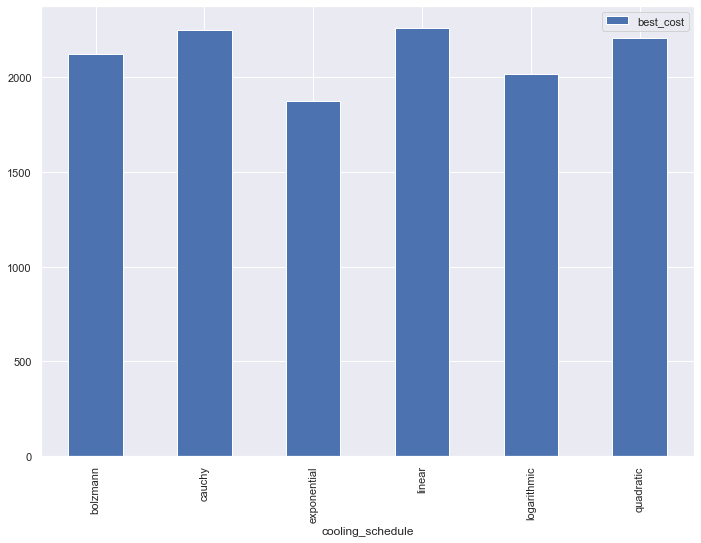

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
means_by_cooling_schedule.plot(y='best_cost', kind='bar')

<AxesSubplot:xlabel='cooling_schedule'>

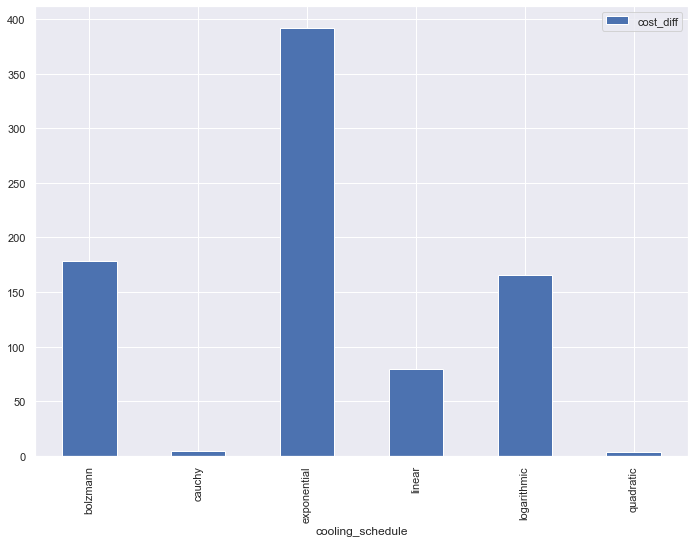

In [5]:
means_by_cooling_schedule.plot(y='cost_diff', kind='bar')

<AxesSubplot:xlabel='cooling_schedule'>

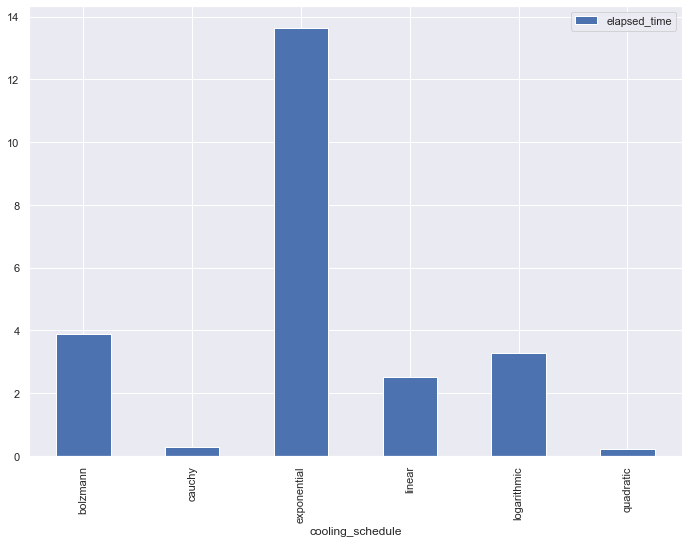

In [6]:
means_by_cooling_schedule.plot(y='elapsed_time', kind='bar')

In [7]:
df.sort_values('elapsed_time', ascending=False)

,parameters,cooling_schedule,initial_cost,best_cost,elapsed_time,cost_diff
35,"(100, 20, 5, 0.999)",exponential,2255.38,1664.88,46.547811,590.50
32,"(100, 20, 3, 0.999)",exponential,2305.00,1480.32,45.266026,824.68
29,"(100, 20, 1, 0.999)",exponential,2220.02,1364.08,39.882143,855.94
26,"(80, 15, 5, 0.999)",exponential,2325.22,1565.12,37.880171,760.10
23,"(80, 15, 3, 0.999)",exponential,2276.38,1439.40,34.940459,836.98
...,...,...,...,...,...,...
176,"(100, 20, 3, 0.999)",quadratic,2176.88,2171.10,0.182195,5.78
148,"(20, 5, 3, 0.995)",quadratic,2178.14,2176.04,0.180451,2.10
157,"(50, 10, 3, 0.995)",quadratic,2183.92,2181.12,0.166059,2.80
153,"(50, 10, 1, 0.95)",quadratic,2206.62,2204.12,0.160657,2.50
